# Vancouver Police Department Crime Data

In [1]:
import pandas as pd
import ipywidgets

## Import the data

The [Vancouver Police Department Crime Data](https://data.vancouver.ca/datacatalogue/crime-data.htm) includes reported crimes and locations dating back to 2003. This is a large dataset therefore we'll downloaded data for 2018 only. Let's import the data with [pandas](https://pandas.pydata.org).

In [2]:
crime = pd.read_csv('./data/crime.csv')

In [3]:
crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2018,11,16,20.0,47.0,16XX W BROADWAY AVE,Fairview,489734.42,5456775.52
1,Break and Enter Residential/Other,2018,7,8,12.0,46.0,4XX E 17TH AVE,Riley Park,493126.48,5455878.78
2,Break and Enter Commercial,2018,1,14,18.0,42.0,8XX HAMILTON ST,Central Business District,491470.48,5458354.67
3,Theft from Vehicle,2018,4,16,8.0,25.0,22XX E 47TH AVE,Victoria-Fraserview,495519.40,5452766.38
4,Theft from Vehicle,2018,1,14,6.0,30.0,9XX EXPO BLVD,Central Business District,491654.33,5458113.67


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38045 entries, 0 to 38044
Data columns (total 10 columns):
TYPE             38045 non-null object
YEAR             38045 non-null int64
MONTH            38045 non-null int64
DAY              38045 non-null int64
HOUR             34891 non-null float64
MINUTE           34891 non-null float64
HUNDRED_BLOCK    38045 non-null object
NEIGHBOURHOOD    34801 non-null object
X                38045 non-null float64
Y                38045 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.9+ MB


## When do crimes occur most often?

In [5]:
crime['MONTH'].value_counts().sort_index().plot(kind='bar',
                                                legend=False,
                                                figsize=(12,8),
                                                title='Reported Crimes by Month');

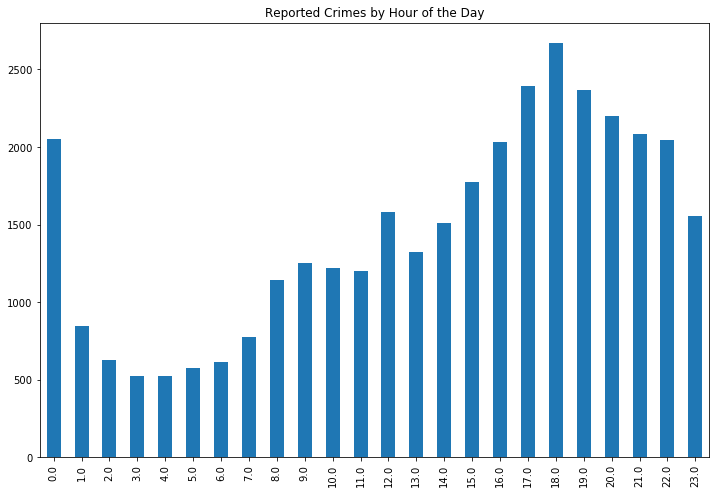

In [6]:
crime['HOUR'].value_counts().sort_index().plot(kind='bar',
                                               legend=False,
                                               figsize=(12,8),
                                               title='Reported Crimes by Hour of the Day');

In [7]:
import datetime

In [8]:
crime['WEEKDAY'] = crime.apply(lambda row: datetime.datetime(row['YEAR'],row['MONTH'],row['DAY']).weekday(),axis=1)

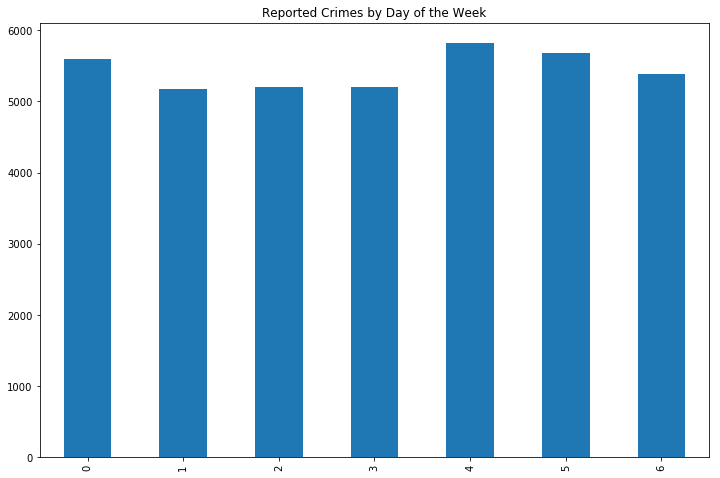

In [9]:
crime['WEEKDAY'].value_counts().sort_index().plot(kind='bar',
                                                  legend=False,
                                                  figsize=(12,8),
                                                  title='Reported Crimes by Day of the Week');

## Which crimes occur most often?

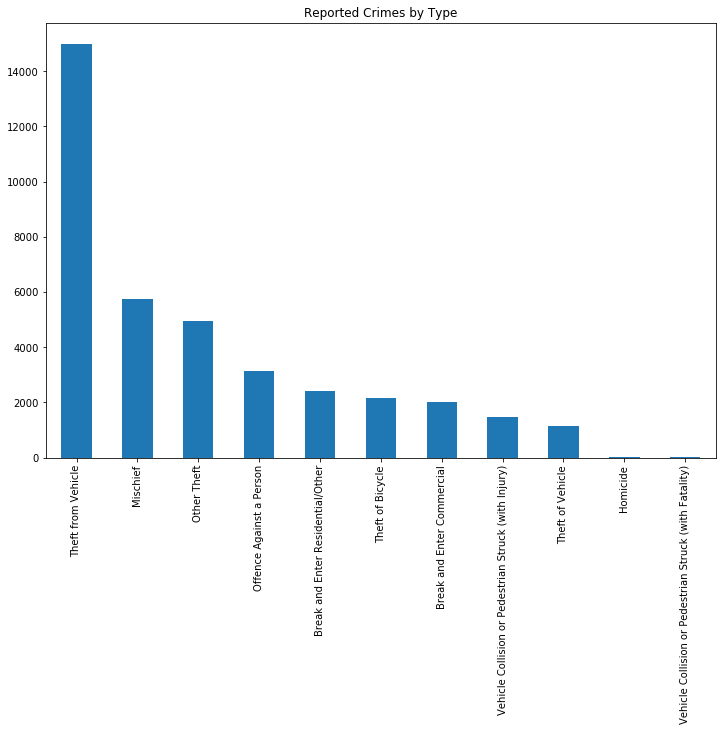

In [10]:
crime['TYPE'].value_counts().plot(kind='bar',legend=False,figsize=(12,8),title='Reported Crimes by Type');

## Where do crimes occur?

In [11]:
crime_types = crime['TYPE'].unique().tolist()
crime_types.remove('Homicide')
crime_types.append('ALL')

In [13]:
dropdown = ipywidgets.Dropdown(options=crime_types,description='Type:')
slider = ipywidgets.IntSlider(value=10,min=5,max=50,description='Marker size:',continuous_update=False)

crime_locations = crime[crime['X'] > 0]

@ipywidgets.interact(crime_type=dropdown,size=slider)
def plot_crime_map(crime_type,size):
    if crime_type != 'ALL':
        crimes = crime_locations[crime_locations['TYPE'] == crime_type]
    else:
        crimes = crime_locations
    crimes.plot(kind='scatter',x='X',y='Y',s=size,lw=0,alpha=0.5,figsize=(14,10))

interactive(children=(Dropdown(description='Type:', options=('Theft from Vehicle', 'Break and Enter Residentia…